# Which words appear frequently in each Obama Speech?

#### We will analyze the speeches delivered by ex president Barack Obama and compute how frequently his favourite set of words appear in each of these speeches.

Text files:
1. Democratic nominee speech
2. Inaugural address speech
3. Inaugural speech
4. Last rally speech

Data files will be cleaned to remove unwanted "data" which includes punctuations, numbers, stopwords etc.

We will be drawing graphs and creating datasets of the selected words to show how better the words get over time.

We will then get fancy and create a wordcloud of the most recurring words used by Barack Obama for each speech.

We will finally calculate how frequently these words appear.

## 1. loading the required libraries

In [2]:
import nltk
import numpy
import string
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2. We load the data for the required dataset  
The data is loaded into different variables to help with separate analysis of the files.

In [4]:
nominee = open("./data/barack_obama_speeches/democratic_nominee.txt")
inaugralAdd = open("./data/barack_obama_speeches/inaugural_address.txt")
inaugralSpeech = open("./data/barack_obama_speeches/inaugural_speech.txt")
lastRally = open("./data/barack_obama_speeches/last_rally.txt")

## 2.1 Read the strings from the loaded files and break the file down into tokens
we need the data loaded to be read into a variable and the variable containing the speech need to be tokenized. Where tokenize means breaking each sentence into an array of words. eg. "I am a boy" after tokenizing becomes ['I','am','a','boy']

In [5]:
nominee = nominee.read() 
inaugralAdd = inaugralAdd.read()
inaugralSpeech = inaugralSpeech.read()
lastRally = lastRally.read()

nominee=word_tokenize(nominee) 
inaugralAdd=word_tokenize(inaugralAdd) 
inaugralSpeech=word_tokenize(inaugralSpeech) 
lastRally=word_tokenize(lastRally) 

## 2.2 Lower each token where applicable
Python is case-sensitive. "Boy" is not the same as "boy", hence converting every word to a lowercase will result in the same word being counted as one.

In [6]:
lower_nominee = [word.lower() for word in nominee] 
lower_inaugralAdd = [word.lower() for word in inaugralAdd]
lower_inaugralSpeech = [word.lower() for word in inaugralSpeech]
lower_lastRally = [word.lower() for word in lastRally]

## 3. Import FreqDist to check how regularly tokens appear
We import the FreqDist from the nltk.probabilty library and we check how frequently tokens appear in Obama's democratic nominee speech.
#### NB: First analysis is on the nominee speech 

In [7]:
from nltk.probability import FreqDist
fdist = FreqDist(lower_nominee)
print(fdist)

df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Token'
df_fdist.sort_values('Frequency', ascending=False)

<FreqDist with 1210 samples and 5309 outcomes>


,Frequency
Token,
.,216
the,213
",",206
and,181
to,135
...,...
shaped,1
behalf,1
intend,1


## 3.1 Plot the frequency distribution of the tokens 
For clarity we will look at just the first 20 most commonly used words in the nominee speech.

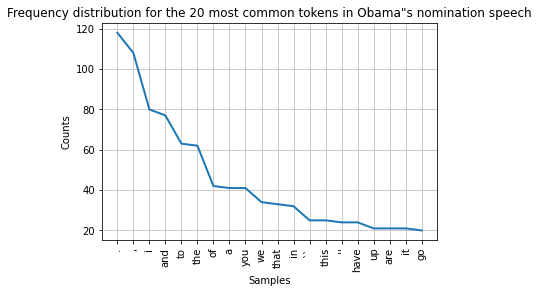

<AxesSubplot:title={'center':'Frequency distribution for the 20 most common tokens in Obama"s nomination speech'}, xlabel='Samples', ylabel='Counts'>

In [9]:
fdist.plot(20,title='Frequency distribution for the 20 most common tokens in Obama"s nomination speech')

## 4. Cleaning the data 
Even though we can see the tokens being displayed, we notice some tokens which make "less" sense in this context.
Eg. we see an apostrophe in there, yet we want to know the most frequently used words, which makes symbols and punctuations irrelevant. 

Also, stopwords, these words rarely will make great contributions to our data so we remove them as well.

In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# Let's have a look what words are usually discarded:
print(string.punctuation)
print(string.digits)
print(stopwords.words('english'))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
0123456789
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', '

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4. 1 We plot the filtered frequency distribution
it is realised it looks better but could be made better.

[("'s", 47), ("n't", 38), ('promise', 32), ('america', 26), ('us', 22), ('mccain', 20), ('american', 19), ('one', 19), ('time', 18), ('keep', 17)]


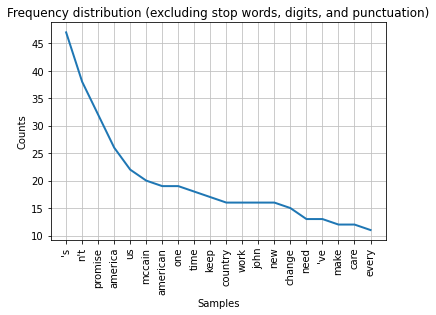

,Frequency
Token,
's,47
n't,38
promise,32
america,26
us,22
...,...
shaped,1
behalf,1
intend,1


In [11]:
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

filtered_text = [token 
                 for token in lower_nominee 
                 if not token in remove_these]

# Note: the above 3-line version could be a one-liner (see below). 
# It's up to you, which format you prefer. The format above, or this:
# filtered_text = [word for word in corpus_tokens if not word in remove_these]

fdist_filtered = FreqDist(filtered_text)
print(fdist_filtered.most_common(10))
fdist_filtered.plot(20,title='Frequency distribution (excluding stop words, digits, and punctuation)')

df_fdist = pd.DataFrame.from_dict(fdist_filtered, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Token'
df_fdist.sort_values('Frequency', ascending=False)

In [11]:
print([token for (token,count) in fdist_filtered.most_common(100)])

["'s", "n't", 'promise', 'america', 'us', 'mccain', 'american', 'one', 'time', 'keep', 'country', 'work', 'john', 'new', 'change', 'need', "'ve", 'make', 'care', 'every', 'people', 'must', 'next', 'years', 'economy', 'washington', "'ll", 'know', 'lives', 'president', 'government', 'nation', 'americans', 'young', 'could', 'tonight', 'ca', 'better', 'democrats', '``', "''", 'also', 'take', 'would', 'many', 'jobs', 'together', 'even', 'bush', 'tell', 'families', 'education', 'future', 'great', 'let', 'last', 'love', 'hard', 'pay', 'politics', 'george', 'election', 'party', 'senator', 'health', 'said', 'workers', 'give', 'back', 'tax', 'help', 'measure', 'child', 'iraq', 'seen', 'united', 'states', 'working', 'night', 'made', 'home', 'well', 'stand', 'two', 'men', 'women', 'worked', 'like', 'republicans', 'chance', 'plan', 'day', 'companies', 'tough', 'end', 'taxes', 'higher', 'man', 'life', 'stood']


## 4.2 Now to more manual removal methods.
We want to remove the occurence of all numbers. Here we assume the numbers are most likely to be from 0 to 100.

In [12]:
# Let's create a range of numbers from 0 to 100 and turn them into strings, so they are like '45' not like 45.
numbers_1_to_100 = [str(integer) for integer in range(101)]
print(numbers_1_to_100)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']


Now moving on to punction marks and other weird occurences

In [13]:
# Here are the weird puctuation marks:
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,','.)','--','\x80\x99',"'s","n't","mccain","'ve","'ll","ca",'``',"''"]
print(extra_punctuation_to_remove)

['.', '..', '...', '....', '.....', '......', ').', '.,', '.)', '--', '\x80\x99', "'s", "n't", 'mccain', "'ve", "'ll", 'ca', '``', "''"]


Now we want to catch all individual stand alone alphabets that may somehow appear in the data

In [14]:
individual_letters = list(string.ascii_lowercase)
print(individual_letters)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


Some even more removals 

In [15]:
some_more_tokens_to_remove = ['rs', 'per', 'would','one','two','first'
                             '000',  '00',  'co', 'ditto', '1st', 'ii', 
                             'total', 'number', 'year', 'years']

Now we combine all the tokens we will like to remove from our data and remove them. 
A final Frequency distribution graph is generated to check out the most occuring words in the nomination speech

[('promise', 32), ('america', 26), ('us', 22), ('american', 19), ('time', 18), ('keep', 17), ('country', 16), ('work', 16), ('john', 16), ('new', 16), ('change', 15), ('need', 13), ('make', 12), ('care', 12), ('every', 11), ('people', 11), ('must', 11), ('next', 10), ('economy', 10), ('washington', 10), ('know', 10), ('lives', 10), ('president', 9), ('government', 9), ('nation', 8), ('americans', 8), ('young', 8), ('could', 8), ('tonight', 8), ('better', 8)]


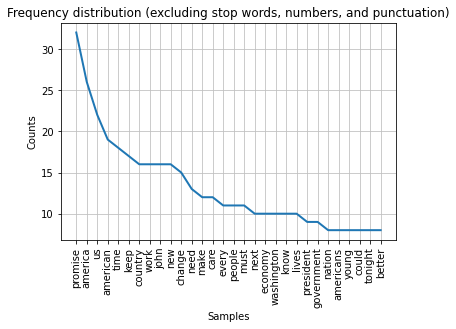

<AxesSubplot:title={'center':'Frequency distribution (excluding stop words, numbers, and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [16]:
# Let's combine it all together and generate our new graph.

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_tokens_to_remove)

filtered_text = [token 
                 for token in lower_nominee 
                 if not token in remove_these]
    
fdist_filtered = FreqDist(filtered_text)
print(fdist_filtered.most_common(30))
fdist_filtered.plot(30,title='Frequency distribution (excluding stop words, numbers, and punctuation)')

## Time to show off!
We will create a word cloud for the most frequently used words in the nomination speech.
Fun part! Words will draw Barack Obama.

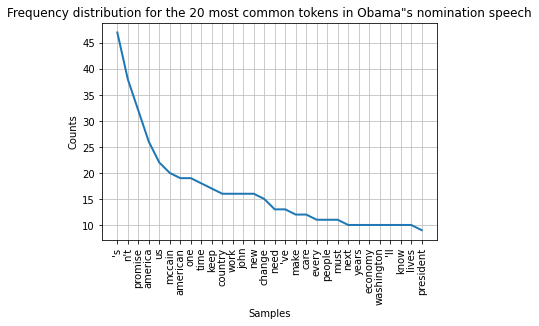

(-0.5, 436.5, 639.5, -0.5)

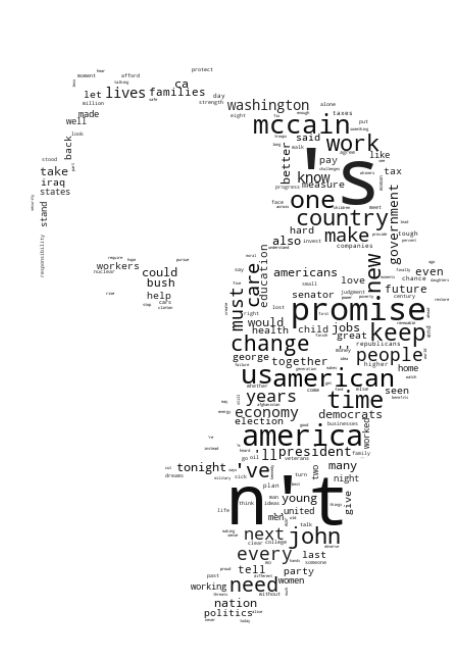

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Masking image
medical_icon_mask_image = np.array(Image.open("./images/om.png"))

# Custom Colormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Image details: background, shape-mask, colours 
wordcloud = WordCloud(width=500, height=1000, background_color="white", mask=medical_icon_mask_image, colormap=cmap, max_words=100000000000)

fdist_filtered.plot(30,title='Frequency distribution for the 20 most common tokens in Obama"s nomination speech')

wordcloud.generate_from_frequencies(fdist_filtered)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

## Results
From the table below we can see the most frequently used words by Obama in his nomination speech. 

In [19]:
df_fdist = pd.DataFrame.from_dict(fdist_filtered, orient='index')
df_fdist.columns = ['Frequency Distribution from the democratic nomination speech']
df_fdist.index.name = 'Token'
df_fdist.sort_values('Frequency Distribution from the democratic nomination speech', ascending=False).head(10)

,Frequency Distribution from the democratic nomination speech
Token,
promise,32
america,26
us,22
american,19
time,18
keep,17
country,16
john,16
work,16


## NB: The code below below will not be explained because it is same for the above, but just analysing the other speeches.

# The Inaugral Address by Barack Obama

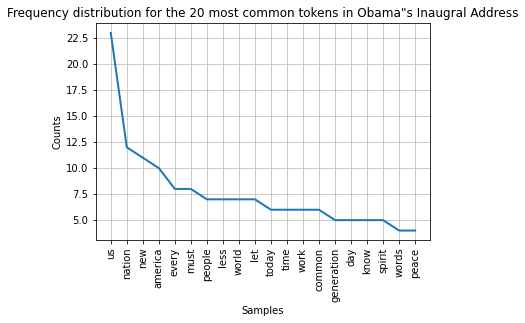

(-0.5, 436.5, 639.5, -0.5)

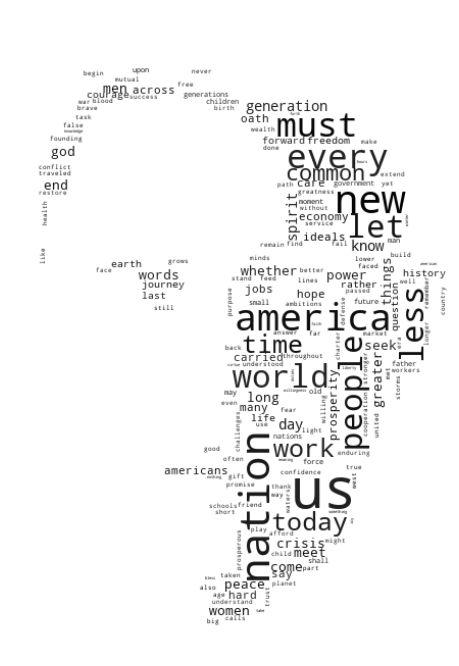

In [20]:

fdist = FreqDist(lower_inaugralAdd)

# fdist.plot(20,title='Frequency distribution for the 20 most common tokens in Obama"s Inaugral Address')

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

filtered_text2 = [token 
                 for token in lower_inaugralAdd 
                 if not token in remove_these]

# Note: the above 3-line version could be a one-liner (see below). 
# It's up to you, which format you prefer. The format above, or this:
# filtered_text = [word for word in corpus_tokens if not word in remove_these]

fdist_filtered2 = FreqDist(filtered_text2)
# print(fdist_filtered2.most_common(10))
# fdist_filtered2.plot(20,title='Frequency distribution (excluding stop words, digits, and punctuation)')

# print([token for (token,count) in fdist_filtered2.most_common(100)])

numbers_1_to_100 = [str(integer) for integer in range(101)]
# print(numbers_1_to_100)

# Here are the weird puctuation marks:
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,','.)','--','\x80\x99',"'s","n't","mccain","'ve","'ll","ca",'``',"''"]
# print(extra_punctuation_to_remove)

individual_letters = list(string.ascii_lowercase)
# print(individual_letters)

some_more_tokens_to_remove = ['rs', 'per', 'would','one','two','first'
                             '000',  '00',  'co', 'ditto', '1st', 'ii', 
                             'total', 'number', 'year', 'years']


# Let's combine it all together and generate our new graph.

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_tokens_to_remove)

filtered_text2 = [token 
                 for token in lower_inaugralAdd 
                 if not token in remove_these]
    
fdist_filtered2 = FreqDist(filtered_text2)
# print(fdist_filtered2.most_common(30))
fdist_filtered2.plot(20,title='Frequency distribution for the 20 most common tokens in Obama"s Inaugral Address')


# Masking image
medical_icon_mask_image = np.array(Image.open("./images/om.png"))

# Custom Colormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Image details: background, shape-mask, colours 
wordcloud = WordCloud(width=500, height=1000, background_color="white", mask=medical_icon_mask_image, colormap=cmap, max_words=100000000000)

wordcloud.generate_from_frequencies(fdist_filtered2)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

## Results from the Inaugural Address 

In [21]:
df_fdist2 = pd.DataFrame.from_dict(fdist_filtered2, orient='index')
df_fdist2.columns = ['Frequency Distribution from the Inaugural Address']
df_fdist2.index.name = 'Token'
df_fdist2.sort_values('Frequency Distribution from the Inaugural Address', ascending=False).head(10)

,Frequency Distribution from the Inaugural Address
Token,
us,23
nation,12
new,11
america,10
every,8
must,8
world,7
let,7
people,7


## The Inaugral Speech by Barack Obama 

['applause', 'us', 'must', '’', 'people', 'time', '--', 'america', 'together', 'country', 'make', 'every', 'citizens', 'nation', 'american', 'equal', 'today', 'journey', 'freedom', 'generation', 'new', 'one', 'still', 'liberty', 'god', 'creed', 'years', 'requires', 'believe', '–-', 'complete', 'life', 'words', 'may', 'government', 'work', 'future', 'americans', 'well', 'act', 'oath', 'fellow', 'enduring', 'made', 'truths', 'men', 'created', 'meaning', 'founding', 'principles', 'free', 'great', 'care', 'alone', 'change', 'world', 'children', 'war', 'long', 'know', 'security', 'happiness', 'knowing', 'peace', 'require', 'carry', 'values', 'common', 'president', 'justice', 'united', 'states', 'strength', 'promise', 'democracy', 'makes', 'two', 'self-evident', 'rights', 'pursuit', 'history', 'never', 'gift', 'earth', 'king', 'rule', 'keep', 'safe', 'blood', 'drawn', 'could', 'schools', 'train', 'thrives', 'initiative', 'hard', 'always', 'individual', 'demands', 'single']


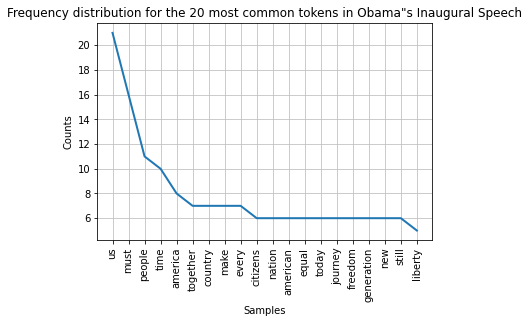

(-0.5, 436.5, 639.5, -0.5)

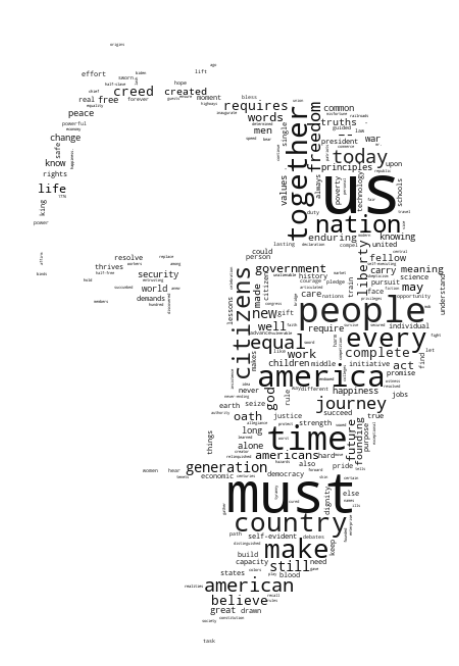

In [22]:

fdist = FreqDist(lower_inaugralSpeech)

# fdist.plot(20,title='Frequency distribution for the 20 most common tokens in Obama"s Inaugral Address')

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

filtered_text3 = [token 
                 for token in lower_inaugralSpeech 
                 if not token in remove_these]

# Note: the above 3-line version could be a one-liner (see below). 
# It's up to you, which format you prefer. The format above, or this:
# filtered_text = [word for word in corpus_tokens if not word in remove_these]

fdist_filtered3 = FreqDist(filtered_text3)
# print(fdist_filtered2.most_common(10))
# fdist_filtered2.plot(20,title='Frequency distribution (excluding stop words, digits, and punctuation)')

print([token for (token,count) in fdist_filtered3.most_common(100)])

numbers_1_to_100 = [str(integer) for integer in range(101)]
# print(numbers_1_to_100)

# Here are the weird puctuation marks:
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,','.)','--','\x80\x99',"'s","n't","mccain","'ve","'ll","ca",'``',"’","`"]
# print(extra_punctuation_to_remove)

individual_letters = list(string.ascii_lowercase)
# print(individual_letters)

some_more_tokens_to_remove = ['rs', 'per', 'would','one','two','first'
                             '000',  '00',  'co', 'ditto', '1st', 'ii', 
                             'total', 'number', 'year', 'years','applause']


# Let's combine it all together and generate our new graph.

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_tokens_to_remove)

filtered_text3 = [token 
                 for token in lower_inaugralSpeech 
                 if not token in remove_these]
    
fdist_filtered3 = FreqDist(filtered_text3)
# print(fdist_filtered2.most_common(30))
fdist_filtered3.plot(20,title='Frequency distribution for the 20 most common tokens in Obama"s Inaugural Speech')


# Masking image
medical_icon_mask_image = np.array(Image.open("./images/om.png"))

# Custom Colormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Image details: background, shape-mask, colours 
wordcloud = WordCloud(width=500, height=1000, background_color="white", mask=medical_icon_mask_image, colormap=cmap, max_words=100000000000)

wordcloud.generate_from_frequencies(fdist_filtered3)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

## Results from the Inaugural Speech  

In [23]:
df_fdist3 = pd.DataFrame.from_dict(fdist_filtered3, orient='index')
df_fdist3.columns = ['Frequency Distribution from the Inaugural Speech']
df_fdist3.index.name = 'Token'
df_fdist3.sort_values('Frequency Distribution from the Inaugural Speech', ascending=False).head(10)

,Frequency Distribution from the Inaugural Speech
Token,
us,21
must,16
people,11
time,10
america,8
country,7
together,7
every,7
make,7


## The Last Rally Speech by Barack Obama  

['``', "''", 'go', 'change', 'fired', "'m", 'ready', 'virginia', 'say', 'one', 'america', "n't", 'us', 'greenwood', "'s", 'tomorrow', 'people', 'get', 'know', 'room', 'says', 'voice', 'campaign', "'ve", 'women', 'back', 'men', 'city', 'time', 'little', 'going', 'willing', 'years', 'open', 'new', 'come', 'would', 'nation', 'look', 'said', 'got', 'together', 'south', 'carolina', 'next', 'like', 'drive', 'turns', 'though', 'even', 'last', 'gone', 'want', 'stories', 'way', 'met', 'work', 'day', 'away', 'ca', 'policies', 'town', 'need', 'times', 'proud', 'tried', 'else', 'united', 'states', 'state', 'really', 'endorsement', 'hotel', 'staff', '—', 'world', 'manassas', 'night', 'election', 'crowd', 'let', 'rally', 'every', 'country', 'happens', 'shared', 'dreams', 'life', 'hope', 'hard', 'american', 'word', 'politics', 'put', 'chance', 'factory', 'reason', 'give', 'starts', "'ll"]


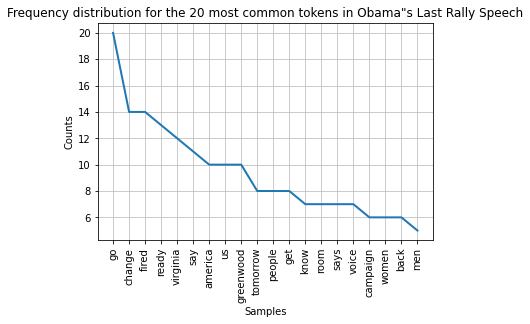

(-0.5, 436.5, 639.5, -0.5)

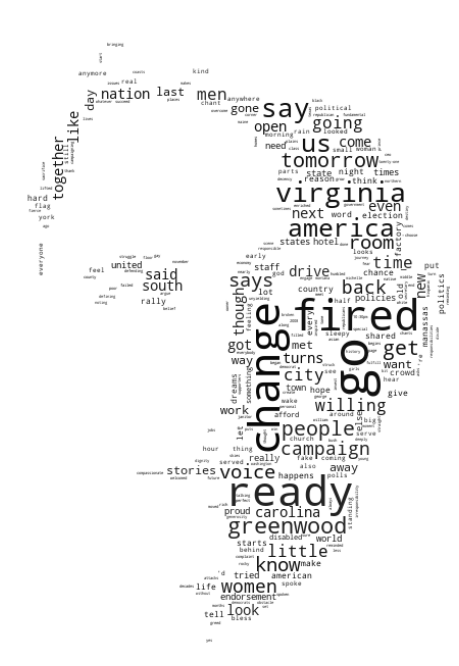

In [16]:

fdist = FreqDist(lower_lastRally)

# fdist.plot(20,title='Frequency distribution for the 20 most common tokens in Obama"s Inaugral Address')

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))

filtered_text4 = [token 
                 for token in lower_lastRally 
                 if not token in remove_these]

# Note: the above 3-line version could be a one-liner (see below). 
# It's up to you, which format you prefer. The format above, or this:
# filtered_text = [word for word in corpus_tokens if not word in remove_these]

fdist_filtered4 = FreqDist(filtered_text4)
# print(fdist_filtered2.most_common(10))
# fdist_filtered2.plot(20,title='Frequency distribution (excluding stop words, digits, and punctuation)')

print([token for (token,count) in fdist_filtered4.most_common(100)])

numbers_1_to_100 = [str(integer) for integer in range(101)]
# print(numbers_1_to_100)

# Here are the weird puctuation marks:
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,','.)','--','\x80\x99',"'s","n't","mccain","'ve","'ll","ca",'``',"’","`","''"]
# print(extra_punctuation_to_remove)

individual_letters = list(string.ascii_lowercase)
# print(individual_letters)

some_more_tokens_to_remove = ['rs', 'per', 'would','one','two','first'
                             '000',  '00',  'co', 'ditto', '1st', 'ii', 
                             'total', 'number', 'year', 'years','applause',"'m"]


# Let's combine it all together and generate our new graph.

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
        + numbers_1_to_100 + extra_punctuation_to_remove + individual_letters+some_more_tokens_to_remove)

filtered_text4 = [token 
                 for token in lower_lastRally
                 if not token in remove_these]
    
fdist_filtered4 = FreqDist(filtered_text4)
# print(fdist_filtered2.most_common(30))
fdist_filtered4.plot(20,title='Frequency distribution for the 20 most common tokens in Obama"s Last Rally Speech')


# Masking image
medical_icon_mask_image = np.array(Image.open("./images/om.png"))

# Custom Colormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

# Image details: background, shape-mask, colours 
wordcloud = WordCloud(width=500, height=1000, background_color="white", mask=medical_icon_mask_image, colormap=cmap, max_words=100000000000)

wordcloud.generate_from_frequencies(fdist_filtered4)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

## Results from the Last Rally Speech 

In [25]:
df_fdist4 = pd.DataFrame.from_dict(fdist_filtered4, orient='index')
df_fdist4.columns = ['Frequency Distribution from the Last Rally Speech']
df_fdist4.index.name = 'Token'
df_fdist4.sort_values('Frequency Distribution from the Last Rally Speech', ascending=False).head(10)

,Frequency Distribution from the Last Rally Speech
Token,
go,20
change,14
fired,14
ready,13
virginia,12
say,11
america,10
us,10
greenwood,10
